## import potrzebnych bibliotek

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

## DATASET

Na swój dataset wybrałem zbiór, który służy do rekomendowania upraw dla odpowiedniej gleby. Może to być bardzo przydatne w produkcji roślinnej (uprawianiu roślin) bez strat opartych na soli fizjologicznej, opadach czy wilgotności i innych składnikach chemicznych obecnych w glebie.

In [70]:
df = pd.read_csv("C:/Users/perfe/Projects/Project_ML/agro/Crops.csv")

## Informacje o danych

Azot - jest głównym składnikiem chlorofilu, związku, dzięki któremu rośliny wykorzystują energię słoneczną do produkcji cukrów z wody i dwutlenku węgla (tj. fotosyntezy). Jest także głównym składnikiem aminokwasów, budulca białek.

Fosfor - jest ważny w procesie podziału komórek i rozwoju nowej tkanki. Fosfor wiąże się również ze złożonymi przemianami energetycznymi w roślinie. Dodanie fosforu do gleby ubogiej w przyswajalny fosfor sprzyja wzrostowi korzeni i odporności na zimno, stymuluje krzewienie, a często przyspiesza dojrzałość.

Potas - jest kluczowym składnikiem odżywczym, który rośliny pobierają z gleby i nawozu. Zwiększa odporność na choroby, poprawia tolerancję na suszę i pomaga roślinom przetrwać zimę.

Średnie temperatury gleby - dla bioaktywności wahają się od 50 do 75 *F. Wartości te sprzyjają normalnym funkcjom życiowym bioty ziemskiej, które zapewniają prawidłowy rozkład materii organicznej, zwiększoną mineralizację azotu, pobieranie substancji rozpuszczalnych i metabolizm.

Zakres pH - 5,5 – 6,5 jest optymalny dla wzrostu roślin, ponieważ wtedy dostępność składników odżywczych w glebie jest optymalna.

Opady deszczu - mogą decydować o tym, jak szybko plon będzie rósł z nasion, o tym, kiedy będzie gotowy do zbioru. Właściwa równowaga deszczu i odpowiednie nawadnianie może prowadzić do szybszego wzrostu roślin, co może skrócić czas kiełkowania i skrócić czas między siewem a zbiorami.

## Sprawdzamy jak wyglądają nasze dane w dataframie

In [71]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Sprawdzamy "rozmiar" naszych danych - shape

In [72]:
print(f'Rozmiar danych: ',df.shape)
df.isna().sum()

Rozmiar danych:  (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Główne najważniejsze informacje o danych

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Dokładniejszy opis danych i tego co faktycznie zawierają

In [74]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Same typy danych 

In [75]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

## Przedstawienie danych ich dystrybucja

Wykres zawartości azotu

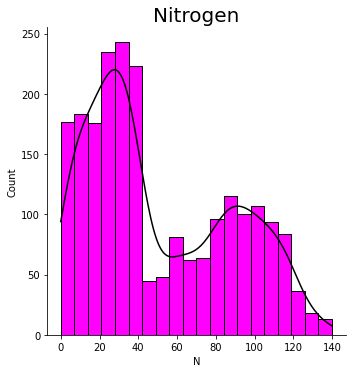

In [76]:
sns.displot(x=df['N'], bins=20, kde=True, color='black', facecolor='magenta')
plt.title("Nitrogen", size=20)
plt.show()

Wykres zawartości fosforu

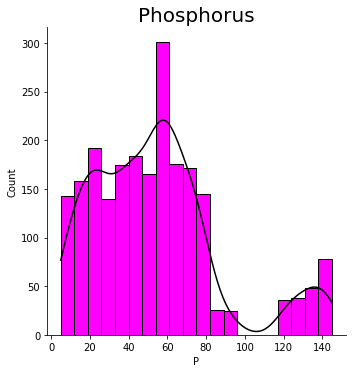

In [77]:
sns.displot(x=df['P'], bins=20, kde=True, color='black', facecolor='magenta')
plt.title("Phosphorus", size=20)
plt.show()

Wykres zawartości potasu

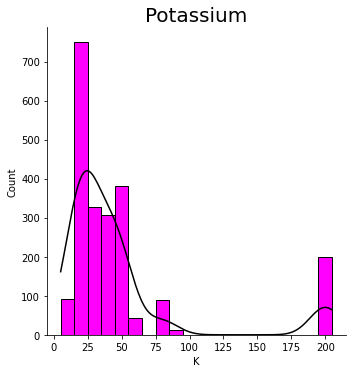

In [78]:
sns.displot(x=df['K'], bins=20, kde=True, color='black', facecolor='magenta')
plt.title("Potassium", size=20)
plt.show()

Wykres temperatur -> rozkład normalny

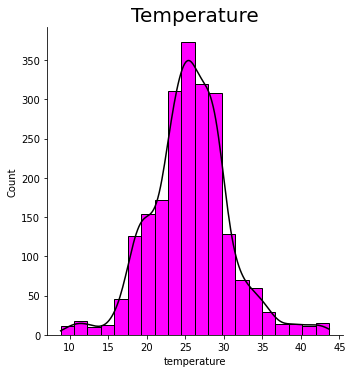

In [79]:
sns.displot(x=df['temperature'], bins=20, kde=True, color='black', facecolor='magenta')
plt.title("Temperature", size=20)
plt.show()

Wykres wilgotności

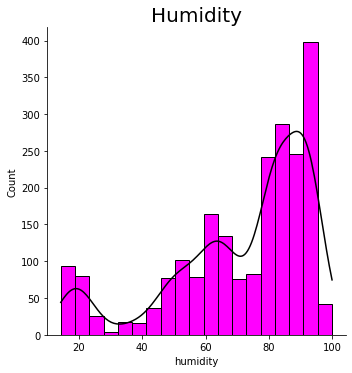

In [80]:
sns.displot(x=df['humidity'], kde=True, color='black', facecolor='magenta')
plt.title("Humidity", size=20)
plt.show()

Wykres opadów

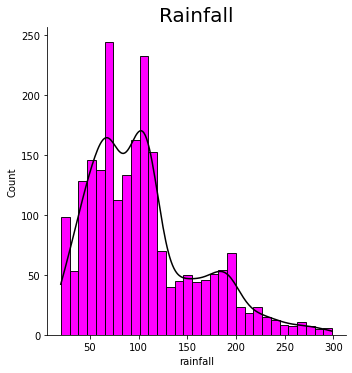

In [81]:
sns.displot(x=df['rainfall'], kde=True, color='black', facecolor='magenta')
plt.title("Rainfall", size=20)
plt.show()

wykres opadów do temperatury z podziałem na konkretne rośliny

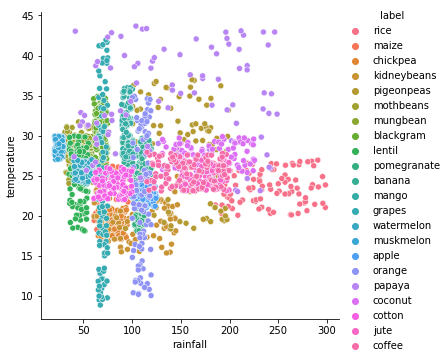

In [82]:
sns.relplot(x='rainfall', y='temperature', data=df, kind='scatter', hue='label')
plt.show()

wykresy konkrentych parametrów dla poszczególnych roślin

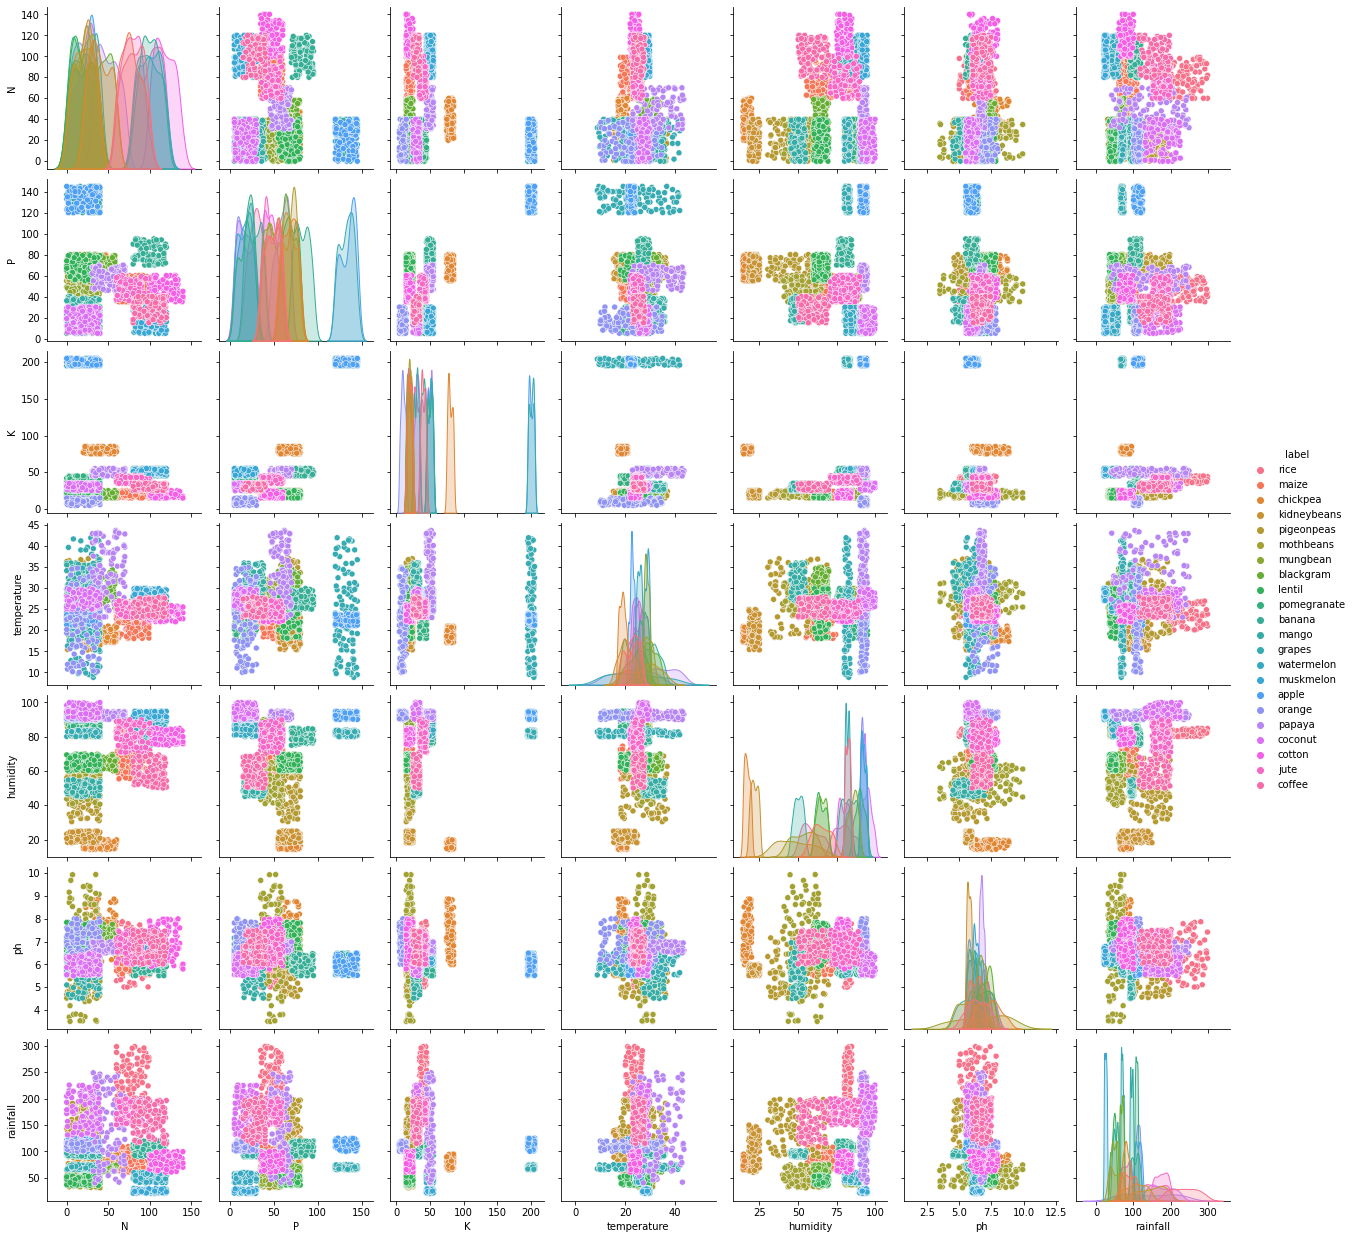

In [83]:
sns.pairplot(data=df,hue='label')
plt.show()

WYKRESY DLA KOLUMN, PARAMETRÓW I ROŚLIN

In [84]:
# Kolumna "label" -> roślinki, zboża

plants = df['label'].unique()
print(len(plants))
print(plants)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [85]:
# filtrowanie kolumny label z roślinami jako listy w df2 żeby zrobić "wykresy z wąsami"

df2=[]

for i in plants:
    df2.append(df[df['label'] == i])
df2[1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


Wykres "z wąsami" wysokości temperatur z podziałem na roślinki

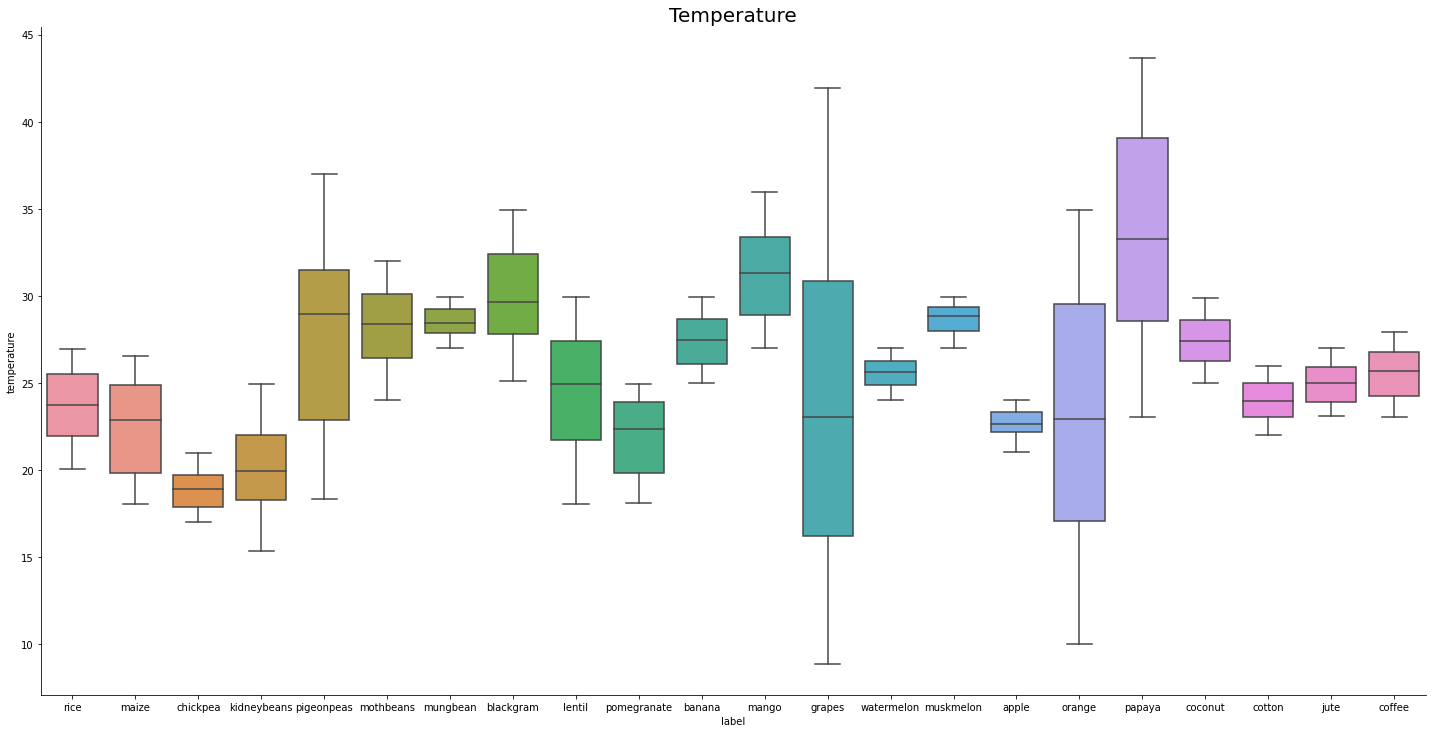

In [86]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=2)
plt.title("Temperature", size=20)
plt.show()

Wykres "z wąsami" wilgotności gleby z podziałem na roślinki

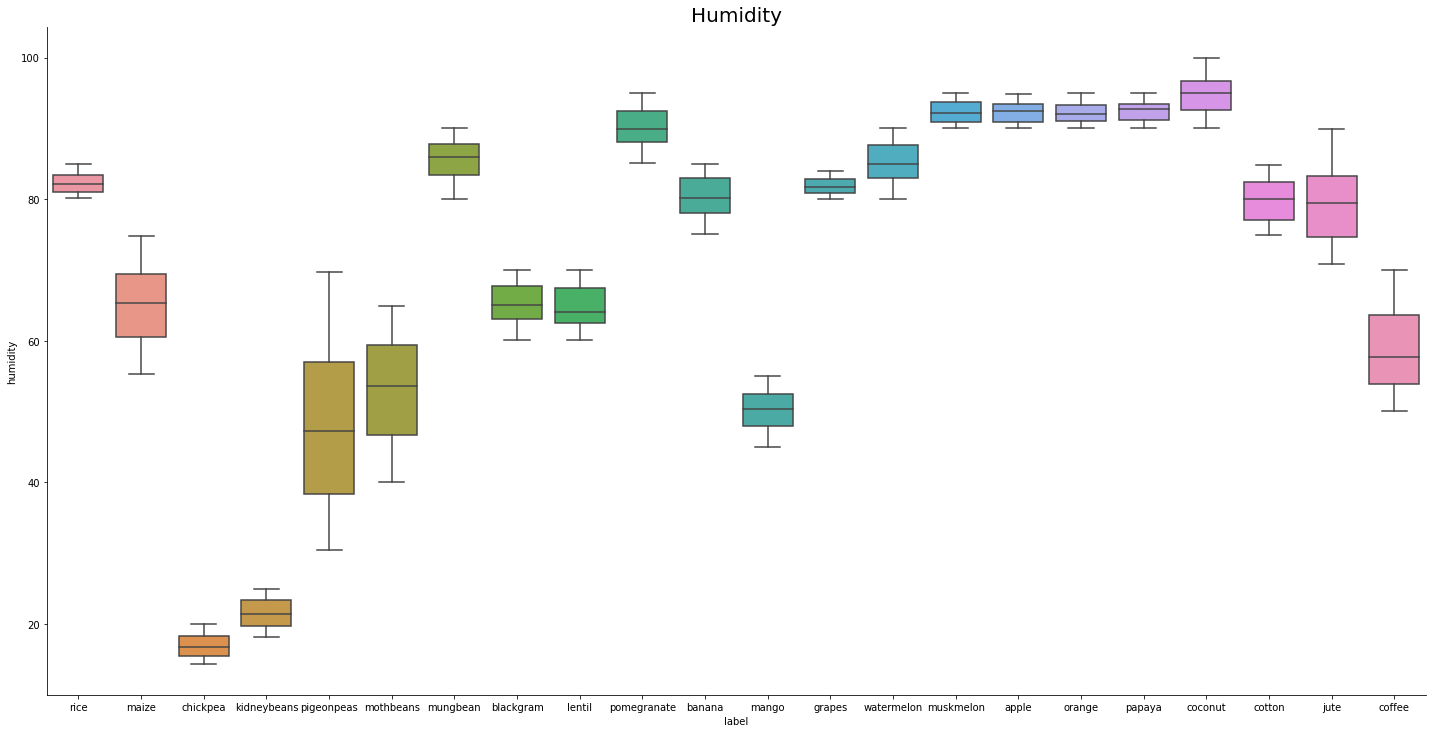

In [87]:
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=2)
plt.title("Humidity", size=20)
plt.show()

Wykres "z wąsami" zawartości azotu z podziałem na roślinki

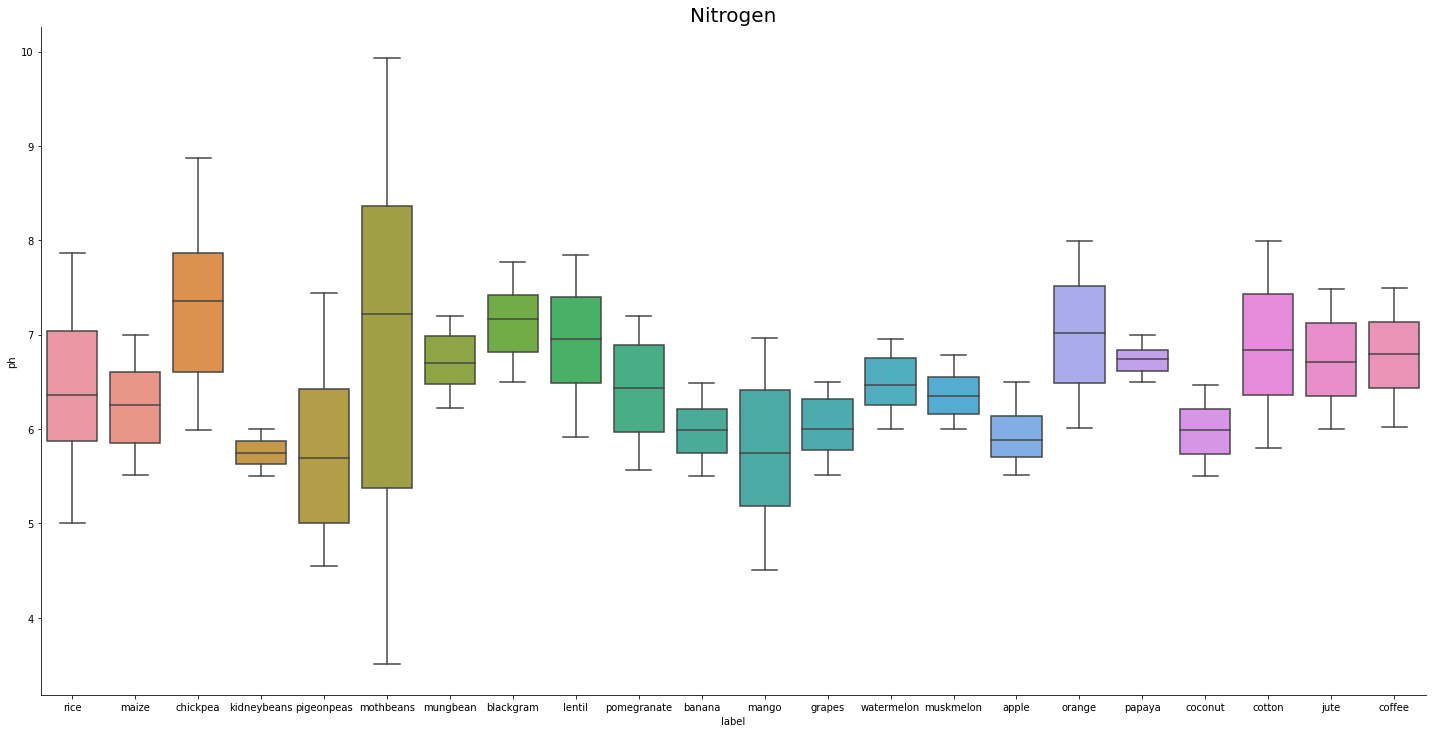

In [88]:
sns.catplot(data=df, x='label', y='ph', kind='box', height=10, aspect=2)
plt.title("Nitrogen",size=20)
plt.show()

Wykres "z wąsami" zawartości fosforu z podziałem na roślinki

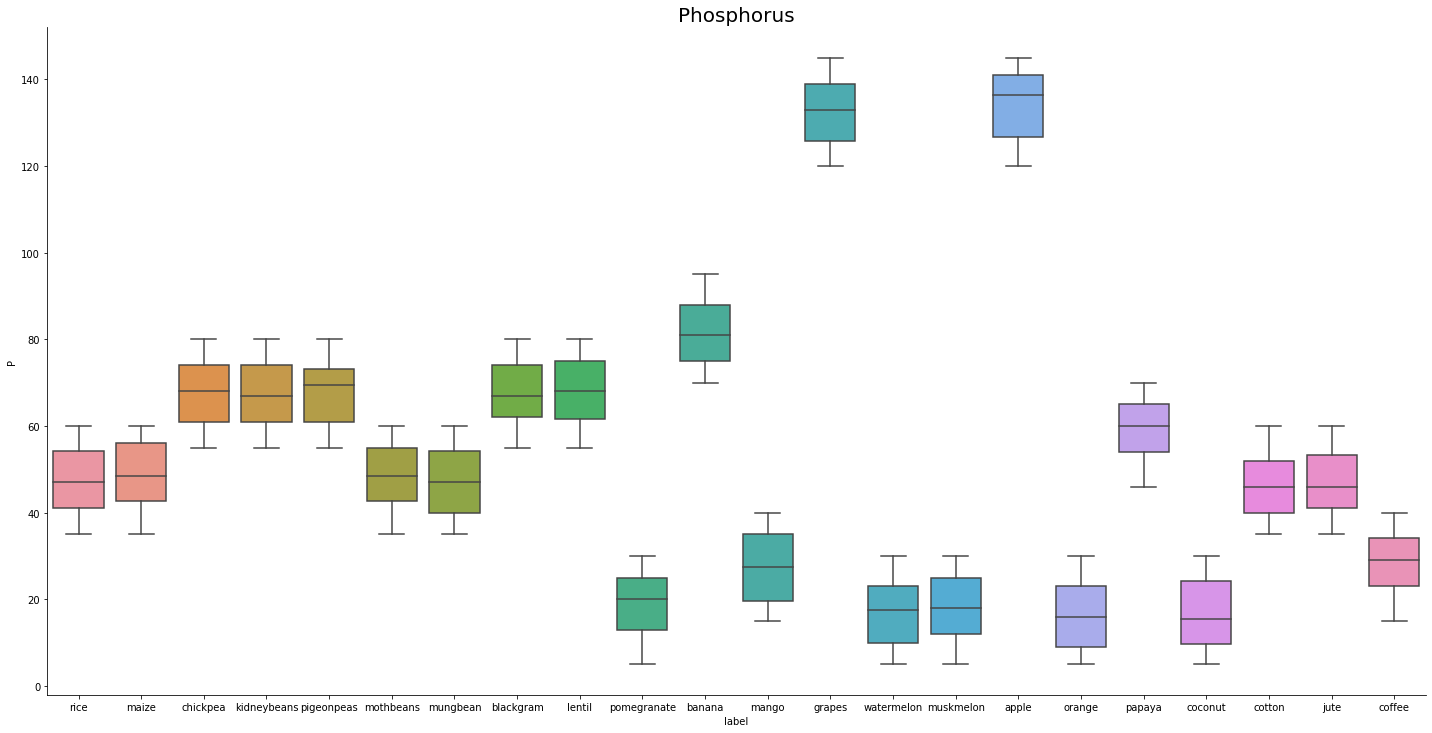

In [89]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=2)
plt.title("Phosphorus",size=20)
plt.show()

Wykres "z wąsami" zawartości potasu z podziałem na roślinki

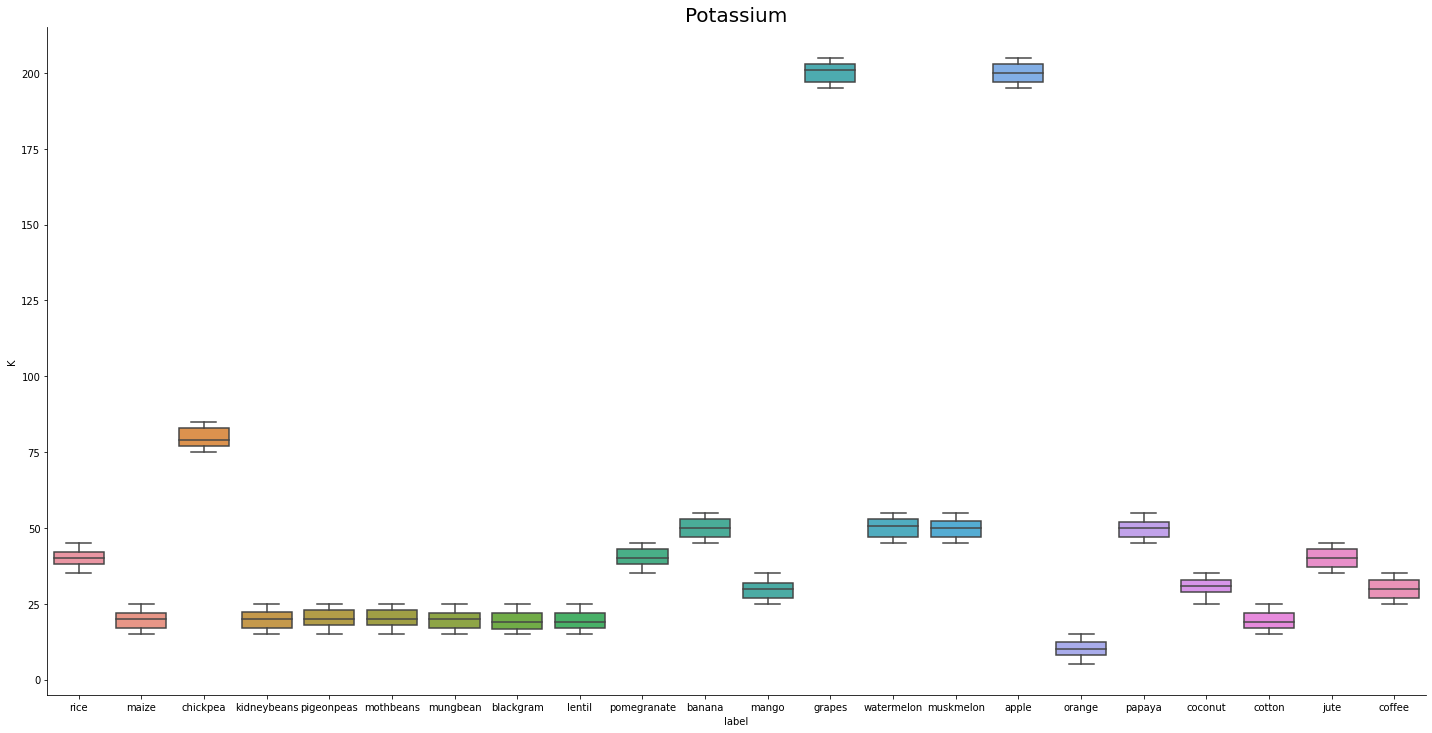

In [90]:
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=2)
plt.title("Potassium",size=20)
plt.show()

## PODZIAŁ NA ZBIÓR TESTOWY I TRENINGOWY

In [91]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [92]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [93]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


## WYBIERANIE NAJLEPSZEGO MODELU

modele: 
Decision Tree, 
Random forest, 
K Classifier, 
Support Vector Mechanism

In [94]:
models={'decision tree' : 
    {
        'model' : DecisionTreeClassifier(criterion='gini'),
        'params':{'decisiontreeclassifier__splitter':['best','random']}
    },
    'random_forest': 
    {
        'model': RandomForestClassifier(),
        'params' : 
        {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
   'k classifier':
   {
       'model':KNeighborsClassifier(),
       'params':{'kneighborsclassifier__n_neighbors':[5,10,15,20,25],'kneighborsclassifier__weights':['uniform','distance']}
   },
   'svm': 
   {
        'model': SVC(gamma='auto',probability=True),
        'params' : 
        {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
   }  
}

Liczenie score dla każdego z modeli

In [95]:
score=[]
details = []
best_param = {}
for mdl,par in models.items():
    pipe = make_pipeline(preprocessing.StandardScaler(),par['model'])
    res = model_selection.GridSearchCV(pipe,par['params'],cv=5)
    res.fit(x_train,y_train)
    score.append({
        'Model name':mdl,
        'Best score':res.best_score_,
        'Best param':res.best_params_
    })
    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl]=res.best_estimator_
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.982424,{'decisiontreeclassifier__splitter': 'best'}
1,random_forest,0.989697,{'randomforestclassifier__n_estimators': 5}
2,k classifier,0.982424,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."
3,svm,0.992121,"{'svc__C': 100, 'svc__kernel': 'rbf'}"


Przedstawienie score dla każdego z modeli

In [96]:
score

[{'Model name': 'decision tree',
  'Best score': 0.9824242424242424,
  'Best param': {'decisiontreeclassifier__splitter': 'best'}},
 {'Model name': 'random_forest',
  'Best score': 0.9896969696969696,
  'Best param': {'randomforestclassifier__n_estimators': 5}},
 {'Model name': 'k classifier',
  'Best score': 0.9824242424242424,
  'Best param': {'kneighborsclassifier__n_neighbors': 5,
   'kneighborsclassifier__weights': 'distance'}},
 {'Model name': 'svm',
  'Best score': 0.992121212121212,
  'Best param': {'svc__C': 100, 'svc__kernel': 'rbf'}}]

score tylko ze df

In [97]:
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.982424,{'decisiontreeclassifier__splitter': 'best'}
1,random_forest,0.989697,{'randomforestclassifier__n_estimators': 5}
2,k classifier,0.982424,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."
3,svm,0.992121,"{'svc__C': 100, 'svc__kernel': 'rbf'}"


In [98]:
for i in best_param.keys():
    print(f'{i} -> zbiór testowy: {best_param[i].score(x_test,y_test)}')
    print(f'{i} -> zbiór treningowy: {best_param[i].score(x_train,y_train)}')

decision tree -> zbiór testowy: 0.9890909090909091
decision tree -> zbiór treningowy: 1.0
random_forest -> zbiór testowy: 0.990909090909091
random_forest -> zbiór treningowy: 0.9993939393939394
k classifier -> zbiór testowy: 0.9618181818181818
k classifier -> zbiór treningowy: 1.0
svm -> zbiór testowy: 0.9854545454545455
svm -> zbiór treningowy: 0.996969696969697


## NAJLEPSZYM MODELEM OKAZAŁ SIĘ RANDOM FOREST

punktacja jaką uzyskał na zbiorze testowym jest najbardziej zbliżona do 1 -> 0,99...

aby zbadać czy model zawyża czy zaniża wynik wyżej policzone zostały score dla zbiorów testowych i treningowych

random forest uzystał wyższy wynik na zbiorze treningowym niż na testowym w związku z czym ma on tendencję do zawyżania.



In [99]:
predicted = best_param['random_forest'].predict(x_test)
predicted

array([13, 15, 11, 20, 21,  6, 10, 10, 14, 20,  8,  2,  6,  4,  5,  9, 11,
       16, 10, 13, 10,  6,  4,  4,  1, 11, 18,  8, 18, 17, 19,  1, 19,  4,
       16,  6,  0,  4,  8,  1,  0, 19,  3, 11, 15, 13, 17, 17, 14, 13,  1,
       17, 20,  5,  1, 15, 17,  5,  1,  7, 12, 10, 12,  2,  8, 20,  2,  5,
        7,  7,  2, 13,  1,  0,  4,  6, 19,  8,  0, 16,  9,  5, 10,  2,  9,
        6, 16, 21, 14,  2, 19, 17, 20,  7,  4,  1, 15, 13,  9, 15,  0,  7,
       20,  3, 14,  5, 18,  6, 10, 13, 17,  0, 15,  4, 18, 21, 14, 10, 18,
       15, 16, 21,  3,  9, 19, 14,  0,  6, 19,  1, 21, 10, 18, 21, 13,  0,
       16,  3,  4,  1, 20,  6, 12, 19,  7,  0,  6,  2, 21,  4, 10,  2, 20,
       11, 11, 12, 12,  9, 17, 11,  1,  7,  1,  1, 17, 10, 16,  6,  4, 19,
        2,  8, 20, 17, 15,  0,  0, 19, 11,  1, 17,  5, 11, 15, 12,  7, 19,
        8, 13, 12, 20,  1, 14, 18, 19, 14,  5, 21, 13,  2, 15,  6,  9,  5,
        3,  6,  4, 20, 11, 16, 18, 21, 18,  0, 21, 16,  4,  7, 18, 12, 19,
        7, 18,  5, 16,  0

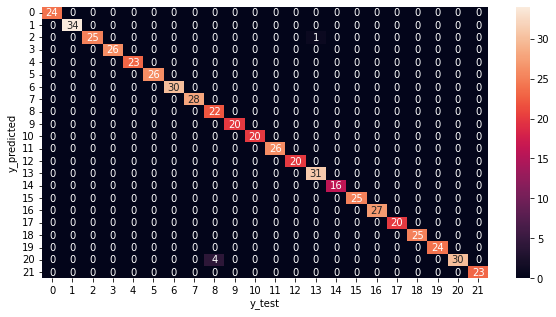

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

## Zwiększamy dokładność poprzez dodanie BaggingClassifier 'a

BaggingClassifier pomaga w zmniejszeniu wariancji poszczególnych estymatorów poprzez wprowadzenie randomizacji do etapu treningowego każdego z estymatorów i stworzenie zespołu ze wszystkich estymatorów.

In [101]:
bag_clf = BaggingClassifier(RandomForestClassifier(),
                            n_estimators=100,max_samples=0.8,
                            bootstrap=True,oob_score=True,n_jobs=-1)

bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=100, n_jobs=-1, oob_score=True)

In [102]:
bag_clf.score(x_test,y_test)

0.9945454545454545

In [103]:
predict = bag_clf.predict(x_test)

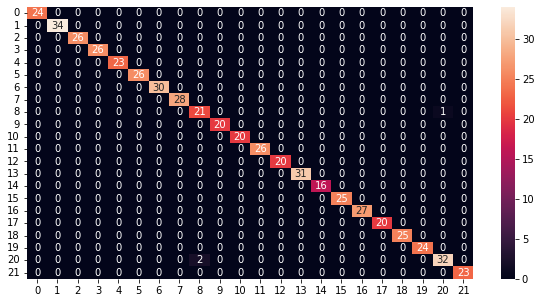

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.show()

Mapowanie wartości pokazuje, która wartość należy do której uprawy. Pomaga w łatwym odczytaniu przewidywanej wartości. 
Np.: Jeśli przewidywana wartość id = 20, to należy do ryżu uprawnego.

In [105]:
dha2 =pd.DataFrame(Y)
code = pd.DataFrame(dha2['label'].unique())

In [106]:
dha = pd.DataFrame(y)
encode = pd.DataFrame(dha[0].unique())
refer = pd.DataFrame()
refer['code']=code
refer['encode']=encode
refer

,code,encode
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


## Punktacja dla każdej z upraw i przewidywania

In [107]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        34
           2       1.00      0.96      0.98        26
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        28
           8       0.85      1.00      0.92        22
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        20
          13       0.97      1.00      0.98        31
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        27
          17       1.00    

Na podstawie uzyskanych wyników można przewidzieć w jakich warunkach gleby najlepiej będzie zastosować daną roślinę uprawną.